STEP 1: Thêm thư viện

In [1]:
!pip install pyvi

In [2]:
!pip install transformers

In [5]:
from pyvi import ViTokenizer, ViPosTagger
import os
import numpy as np
import pandas as pd
import gensim
import sklearn
import tensorflow as tf
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import *
from keras.layers import *
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.optimizers import Adam

STEP 2: Trích lấy data

In [7]:
#đường dẫn
TRAIN_PATH = "Data/10Topics/Ver1.1/Train_Full"
TEST_PATH = "Data/10Topics/Ver1.1/Test_Full"

In [9]:
#chủ đề
category2id = {category: idx for idx, category in enumerate(os.listdir(TRAIN_PATH))}
category2id

{'Chinh tri Xa hoi': 0,
 'Doi song': 1,
 'Khoa hoc': 2,
 'Kinh doanh': 3,
 'Phap luat': 4,
 'Suc khoe': 5,
 'The gioi': 6,
 'The thao': 7,
 'Van hoa': 8,
 'Vi tinh': 9}

In [10]:
#lấy dữ liệu
data = []
def read_file(p,category, file_name):
    text_path = os.path.join(p, category, file_name)
    with open(text_path, "r", encoding = 'utf-16') as file:
        content = file.read()
    return (content, category2id[category])
print("TRAIN:")
for category in os.listdir(TRAIN_PATH):
    category_path = os.path.join(TRAIN_PATH, category)
    print(category_path)
    data.extend([ read_file(TRAIN_PATH,category, file_name) for file_name in os.listdir(category_path)])

TRAIN:
Data/10Topics/Ver1.1/Train_Full\Chinh tri Xa hoi
Data/10Topics/Ver1.1/Train_Full\Doi song
Data/10Topics/Ver1.1/Train_Full\Khoa hoc
Data/10Topics/Ver1.1/Train_Full\Kinh doanh
Data/10Topics/Ver1.1/Train_Full\Phap luat
Data/10Topics/Ver1.1/Train_Full\Suc khoe
Data/10Topics/Ver1.1/Train_Full\The gioi
Data/10Topics/Ver1.1/Train_Full\The thao
Data/10Topics/Ver1.1/Train_Full\Van hoa
Data/10Topics/Ver1.1/Train_Full\Vi tinh


In [13]:
data

[(' Thành lập dự án POLICY phòng chống HIV/AIDS ở VN (NLĐ)- Quỹ hỗ trợ khẩn cấp về AIDS của Hoa Kỳ vừa thành lập dự án POLICY tại VN với cam kết hỗ trợ Chính phủ và nhân dân VN đối phó HIV/AIDS.Dự án có nhiệm vụ chính là cải thiện công tác phòng chống HIV/AIDS thông qua các lĩnh vực xây dựng chính sách, rà soát các văn bản pháp luật, xây dựng chiến lược quảng bá, xây dựng chương trình đào tạo về phòng chống HIV/AIDS, lên kế hoạch bố trí nguồn lực, huấn luyện và nghiên cứu về phương tiện truyền thông đại chúng, tổ chức các hoạt động nhằm giảm kỳ thị và phân biệt đối xử đối với người có HIV/AIDS... Theo TTXVN, dự án POLICY đặc biệt quan tâm đến công tác truyền thông phòng chống HIV/AIDS, coi đây là một biện pháp tích cực và hữu hiệu trong việc phòng chống có hiệu quả HIV/AIDS. Thời gian tới, dự án POLICY sẽ tiếp tục tổ chức các hoạt động nhằm nâng cao nhận thức cho những người có trách nhiệm với công tác chỉ đạo phòng chống HIV/AIDS.\n\n',
  0),
 (' Hơn 16.000 khách đến vịnh Nha Trang Th

In [11]:
test_data = []
print("TEST:")
for category in os.listdir(TEST_PATH):
    category_path = os.path.join(TEST_PATH, category)
    print(category_path)
    test_data.extend([ read_file(TEST_PATH,category, file_name) for file_name in os.listdir(category_path)])

TEST:
Data/10Topics/Ver1.1/Test_Full\Chinh tri Xa hoi
Data/10Topics/Ver1.1/Test_Full\Doi song
Data/10Topics/Ver1.1/Test_Full\Khoa hoc
Data/10Topics/Ver1.1/Test_Full\Kinh doanh
Data/10Topics/Ver1.1/Test_Full\Phap luat
Data/10Topics/Ver1.1/Test_Full\Suc khoe
Data/10Topics/Ver1.1/Test_Full\The gioi
Data/10Topics/Ver1.1/Test_Full\The thao
Data/10Topics/Ver1.1/Test_Full\Van hoa
Data/10Topics/Ver1.1/Test_Full\Vi tinh


In [14]:
test_data

[(' Mạo hiểm rừng Đa Mi Cuộc hành quân khám phá thác sương mù Ẩn mình trong cánh rừng Đa Mi (Hàm Thuận Bắc, Bình Thuận) bạt ngàn là hồ thủy điện Đa Mi đẹp như một nàng công chúa, ngọn thác sương mù hùng vĩ, cao ngất, uốn lượn như con rồng bạc khổng lồ...\nXuyên rừng vào thác sương mù \nTrời đã về chiều khi chúng tôi đến được hồ thủy điện Đa Mi rộng 625ha với rất nhiều hòn đảo nhỏ đẹp như bức tranh thủy mạc dần hiện ra trong ánh hoàng hôn huyền ảo. \nNơi lưu trú đêm đầu tiên của chúng tôi là “khách sạn ngàn sao” (sân bay dã chiến của nhà máy thủy điện) với tất cả dịch vụ phải tự lo. Đến thủy điện nhưng nơi hạ trại lại không có điện. Đêm xuống bốn bề tối đen như mực. Lửa bùng lên. \nBất ngờ, Hoài Nhưỡng - bí thư chi đoàn xã Đa Mi - cùng một nhóm thanh niên xã vượt hơn 20km đường đèo vào thăm. “Lần đầu tiên có đoàn thành phố ở lại đêm đó. Hay tin bọn mình rủ nhau đi liền”, các bạn cho biết. Lời ca, tiếng hát vang theo tiếng đàn guitar chập chùng đêm rừng làm ấm lòng cả khách lẫn chủ. \nTầ

In [43]:
def TK(data):
    ARR=[]
    for dt in data:
        e=ViTokenizer.tokenize(dt[0])
        ARR.append(e)
    return ARR;

In [80]:
TRAIN_DATA=[]
TEST_DATA=[]


TFIDF

    - Viết tắt từ cụm từ tiếng Anh: term frequency–inverse document frequency, là một thống kê số học nhằm phản ánh tầm quan trọng của một từ đối với một văn bản trong một tập hợp hay một ngữ liệu văn bản.
    

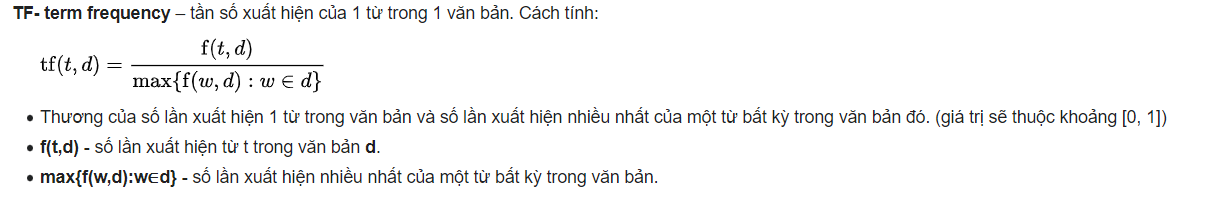

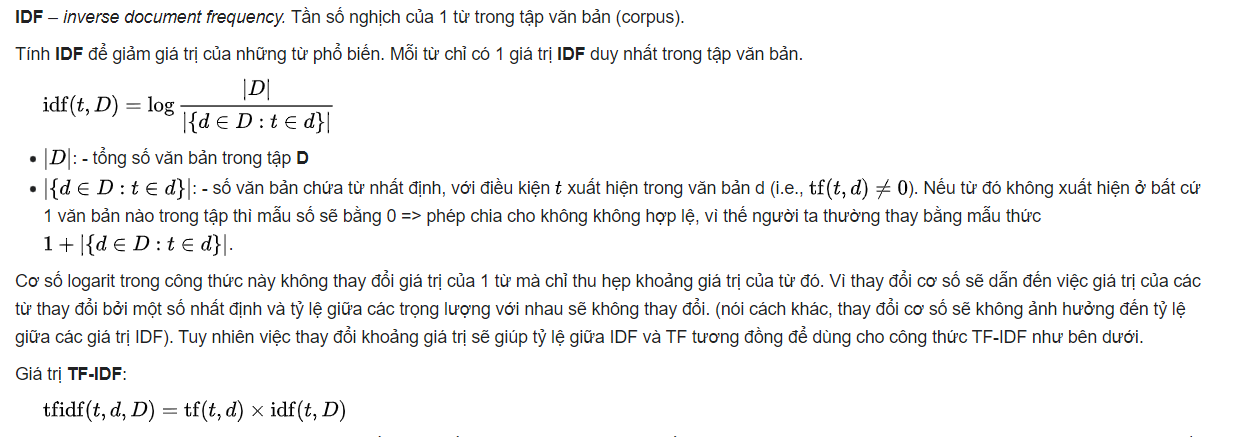

In [81]:
def tfidf(data):
    tfidf_vect_ngram = TfidfVectorizer()
    e= tfidf_vect_ngram.fit_transform(data)
    return e

WORD_TO_VEC

    Ý tưởng cơ bản của word2vec có thể được gói gọn trong các ý sau:

    - Hai từ xuất hiện trong những văn cảnh giống nhau thường có ý nghĩa gần với nhau.

    - Ta có thể đoán được một từ nếu biết các từ xung quanh nó trong câu. Ví dụ, với câu “Hà Nội là … của Việt Nam” thì từ trong dấu ba chấm khả năng cao là “thủ đô”. Với câu hoàn chỉnh “Hà Nội là thủ đô của Việt Nam”, mô hình word2vec sẽ xây dựng ra embeding của các từ sao cho xác suất để từ trong dấu ba chấm là “thủ đô” là cao nhất.

In [82]:
def get_word2vec_data(X):
    word2vec_data = []
    for x in X:
        sentence = []
        for word in x.split(" "):
            if word in vocab:
                sentence=sentence+wv[word].ravel().tolist()
        word2vec_data.append(sentence)

    return word2vec_data
def change_to_word2vec(data):
    data2vec=get_word2vec_data(data)
    lengthOfdata=[len(data2vec[i]) for i,n in enumerate(data2vec)]
    for i,n in enumerate(data):
        if(len(data2vec[i])<max(lengthOfdata)):
            for j in range(1,(max(lengthOfdata)-len(data2vec[i]))+1):
                data2vec[i].append(0)
    return truncatedvectors(np.array(data2vec))

BAG OF WORD 

    Nó được gọi là "túi" từ, bởi vì bất kỳ thông tin nào về thứ tự hoặc cấu trúc của các từ trong tài liệu đều bị loại bỏ. Mô hình chỉ quan tâm đến việc các từ đã biết có xuất hiện trong tài liệu hay không, chứ không phải ở vị trí nào trong tài liệu.

    - Bước 1: Thu thập dữ liệu
    

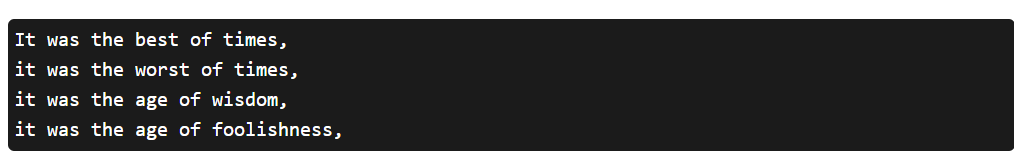

    - Bước 2: Thiết kế Từ vựng

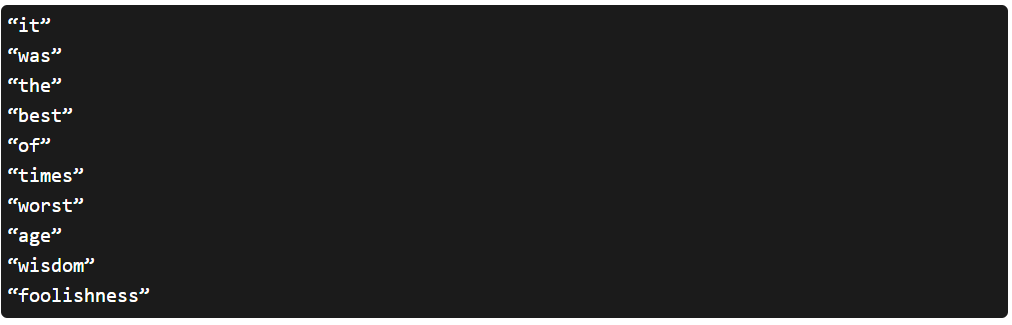

    - Bước 3: Tạo vectơ tài liệu (document vector)


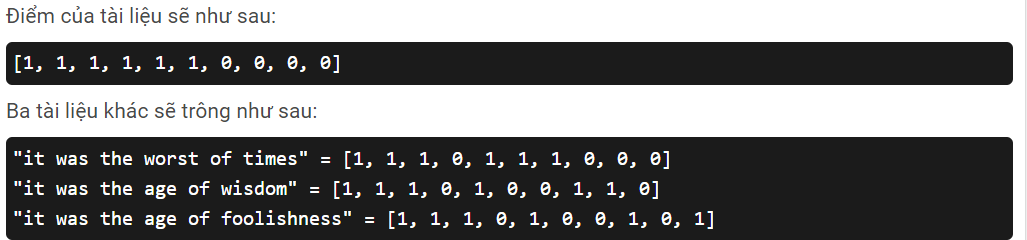

In [83]:
#Bag Of Words

def bow(data):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data)
    datacmtbow = tokenizer.texts_to_sequences(data)
    datacmtbow= pad_sequences(datacmtbow, maxlen=300)
    return datacmtbow

In [84]:
import torch
from typing import List, Tuple, Dict


In [85]:
train_data, valid_data = train_test_split(data, test_size = 0.25)

In [86]:
#y_train, y_val = train_test_split(test_data, test_size = 0.25)

STEP 3: Phân loại dữ liệu(data và label)

In [87]:
class VNTCDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __getitem__(self, idx):
        return self.data[idx]

    def __len__(self):
        return len(self.data)

In [88]:
vntc_train_data = VNTCDataset(train_data)
vntc_valid_data = VNTCDataset(valid_data)
vntc_test_data = VNTCDataset(test_data)

In [89]:
def collate_fn(data: List[Tuple[str, int]]):
    texts = []
    labels = []
    for content, label in data:
        texts.append(ViTokenizer.tokenize(content))
        labels.append(label)    
    return texts, labels

In [61]:
(a,b) = collate_fn(vntc_train_data)

In [90]:
(test_a,test_b) = collate_fn(vntc_test_data)

data là a

In [63]:
a

['LG giới_thiệu Mobile TV siêu_cấp \n Các chuyên_gia dự_đoán rằng Mobile TV sẽ là loại điện_thoại_di_động thời_thượng nhất trong năm 2006 , vượt mặt các loại điện_thoại_di_động camera vốn đã quá phổ_biến lâu_nay . Nhưng cuộc_chiến về các chuẩn cho điện_thoại_di_động TV đã bắt_đầu bùng_phát và ngày_càng dữ_dội . \n Chuẩn DVB - H của Nokia hỗ_trợ hoàn_toàn cho các chuẩn GSM , GPRS và WCDMA vốn đang là chuẩn công_nghệ kết_nối không dây của khoảng 70 % số điện_thoại_di_động trên thế_giới . Qualcomm cũng mới vừa tung ra chuẩn Media FLO được cho là còn tốt hơn cả chuẩn DVB - H , chuẩn này được đại_gia Verizon chống lưng phát_triển . \n Một chuẩn khác cũng có vẻ còn hiện_đại hơn chuẩn DVB - H là chuẩn truyền_thông đa_phương_tiện kỹ_thuật_số ( DMB ) do các đại công_ty sản_xuất ĐTDĐ của Hàn_Quốc_thiết_lập nên . Ngoài việc chuyển_tải các chương_trình TV đến ĐTDĐ , chuẩn này còn có khả_năng chuyển_tải video , hình_ảnh , âm_thanh và dữ_liệu khác … \n LG chưa tiết_lộ bất_kỳ chi_tiết gì về loại điện

b là label

In [72]:
b

[9,
 1,
 4,
 2,
 2,
 7,
 0,
 7,
 9,
 8,
 4,
 5,
 7,
 8,
 3,
 6,
 8,
 0,
 7,
 0,
 3,
 5,
 3,
 0,
 4,
 4,
 0,
 8,
 4,
 6,
 9,
 5,
 8,
 4,
 4,
 7,
 6,
 3,
 0,
 5,
 0,
 7,
 4,
 9,
 6,
 7,
 6,
 4,
 3,
 1,
 9,
 0,
 9,
 0,
 7,
 6,
 5,
 5,
 8,
 7,
 8,
 5,
 7,
 5,
 6,
 0,
 2,
 7,
 3,
 7,
 7,
 7,
 4,
 3,
 0,
 4,
 8,
 5,
 0,
 9,
 7,
 5,
 4,
 9,
 1,
 7,
 8,
 3,
 9,
 9,
 7,
 9,
 3,
 6,
 0,
 0,
 7,
 4,
 0,
 1,
 1,
 4,
 5,
 8,
 9,
 7,
 0,
 7,
 3,
 0,
 1,
 9,
 0,
 7,
 2,
 4,
 7,
 4,
 7,
 5,
 8,
 2,
 3,
 6,
 0,
 0,
 1,
 1,
 1,
 8,
 2,
 6,
 3,
 0,
 9,
 8,
 2,
 7,
 5,
 8,
 6,
 7,
 7,
 3,
 1,
 7,
 1,
 0,
 6,
 9,
 7,
 1,
 3,
 6,
 8,
 7,
 6,
 6,
 3,
 6,
 6,
 0,
 4,
 7,
 7,
 7,
 1,
 5,
 7,
 9,
 0,
 0,
 5,
 6,
 0,
 1,
 4,
 0,
 6,
 1,
 7,
 4,
 8,
 1,
 9,
 2,
 0,
 1,
 6,
 4,
 7,
 1,
 7,
 5,
 0,
 9,
 4,
 5,
 7,
 0,
 0,
 4,
 8,
 0,
 4,
 6,
 9,
 9,
 5,
 3,
 1,
 7,
 1,
 4,
 3,
 5,
 0,
 5,
 9,
 0,
 3,
 2,
 8,
 2,
 1,
 4,
 6,
 0,
 7,
 8,
 6,
 9,
 4,
 8,
 1,
 7,
 5,
 2,
 0,
 1,
 4,
 0,
 7,
 4,
 7,
 0,
 4,
 4,
 7,
 7,


STEP 4: Tính TFIDF cho tập train và test

In [66]:
X_data_tfidf=tfidf(a)
X_data_tfidf

<25319x126027 sparse matrix of type '<class 'numpy.float64'>'
	with 4770048 stored elements in Compressed Sparse Row format>

In [91]:
Test_X_data_tfidf = tfidf(test_a)
Test_X_data_tfidf

<50373x197826 sparse matrix of type '<class 'numpy.float64'>'
	with 10043631 stored elements in Compressed Sparse Row format>

STEP 5: phân tách tập train và label trước khi kiểm thử

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X_data_tfidf,b, test_size=0.2, random_state=42)

In [92]:
Test_X_train, Test_X_val, Test_y_train, Test_y_val = train_test_split(Test_X_data_tfidf,test_b, test_size=0.2, random_state=42)

STEP 6: SVM

    SVM là thuật toán giám sát chủ yếu sửa dụng cho việc phân loại

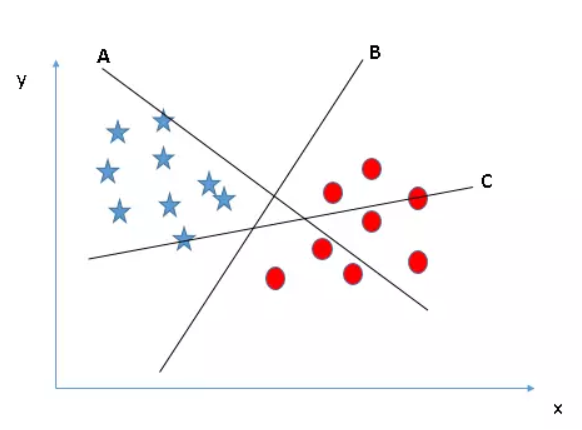

    Công việc của mô hình SVM sẽ tìm ra siêu mặt phẳng(được gọi là hyper-lane) có khả năng phân loại tốt nhất ( tìm hyper-lane có khoảng cách Margin lớn nhất)

accuracy

    Cách đơn giản và hay được sử dụng nhất là accuracy (độ chính xác). Cách đánh giá này đơn giản tính tỉ lệ giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.

Precision và Recall

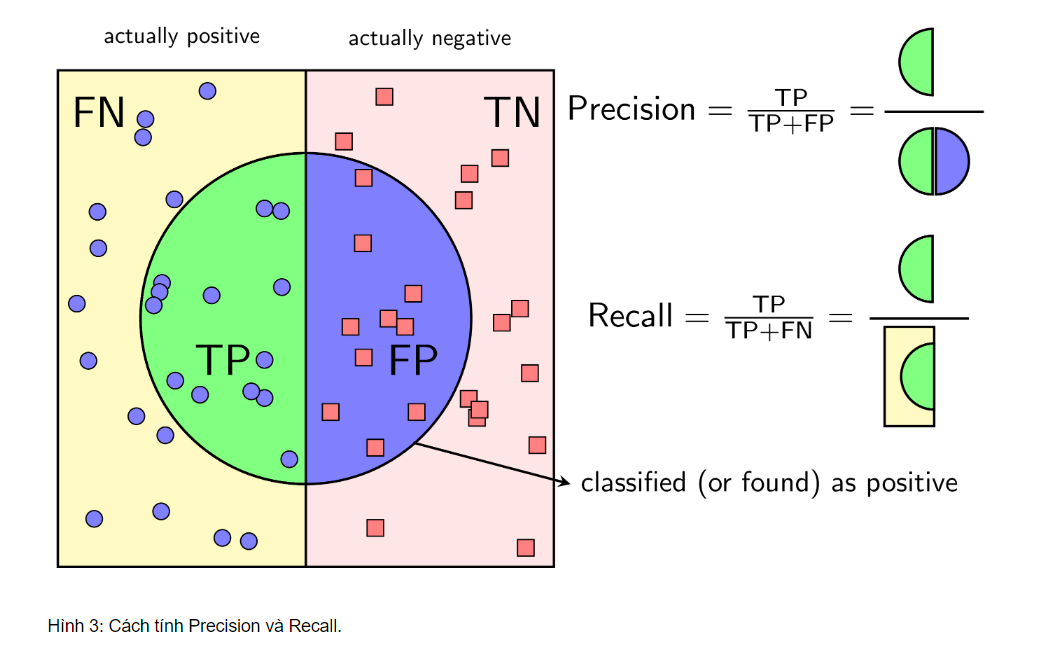

    Với một cách xác định một lớp là positive, Precision được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive (TP + FP).

    Recall được định nghĩa là tỉ lệ số điểm true positive trong số những điểm thực sự là positive (TP + FN).

In [71]:
#kernel:linear, rbf
#gamma: [1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1e]
#C: [1,10,100,1000]
#You can change this parameters to have the best answer
clf=svm.SVC(kernel='linear',C=1000)
clf.fit(X_train, y_train)
val_predictions = clf.predict(X_val)
print(classification_report(val_predictions, y_val))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       804
           1       0.87      0.89      0.88       495
           2       0.87      0.85      0.86       293
           3       0.90      0.90      0.90       362
           4       0.90      0.94      0.92       558
           5       0.93      0.91      0.92       512
           6       0.93      0.92      0.92       438
           7       0.98      0.99      0.99       775
           8       0.93      0.94      0.93       477
           9       0.94      0.95      0.94       350

    accuracy                           0.91      5064
   macro avg       0.91      0.91      0.91      5064
weighted avg       0.91      0.91      0.91      5064



In [93]:
#kernel:linear, rbf
#gamma: [1e-3,5e-3,1e-2,5e-2,1e-1,5e-1,1e]
#C: [1,10,100,1000]
#You can change this parameters to have the best answer
clf.fit(Test_X_train, Test_y_train)
val_predictions = clf.predict(Test_X_val)
print(classification_report(val_predictions, Test_y_val))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1565
           1       0.73      0.71      0.72       412
           2       0.80      0.81      0.80       386
           3       0.93      0.91      0.92      1088
           4       0.91      0.92      0.91       737
           5       0.93      0.93      0.93      1090
           6       0.94      0.96      0.95      1351
           7       0.98      0.98      0.98      1322
           8       0.95      0.93      0.94      1234
           9       0.95      0.96      0.95       890

    accuracy                           0.92     10075
   macro avg       0.90      0.90      0.90     10075
weighted avg       0.92      0.92      0.92     10075

